### Sun as a Black body at 5800K

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [6]:
# Constant
c = 3e8 # sp. of light
h = 6.626e-34 # plancks constant
k = 1.38e-23 # boltzmann constant
T = 5800 # Temperature of Sun

In [7]:
n = 500 # no of points
Lambda = np.linspace(1e-8,3e-6,n) # Wavelength

def EnergyP(L):
  const = (h*c)/(L*k*T)
  expo = np.exp(const)
  return ((8*np.pi*h*c)/(L**5))*(1/(expo-1))

Ep = EnergyP(Lambda)

A) Find Lmax for Maximum Energy

In [8]:
Emax = max(Ep)
# ind = np.argwhere(Ep==Emax)[0]
# Lmax = Lambda[ind][0]
Lmax = Lambda[np.argmax(Ep)]

print(f'{Emax:.6e} is maximum energy at Lambda = {Lmax:.5e}')

1.121100e+06 is maximum energy at Lambda = 5.01343e-07


B) Percentage of Radiation

In [9]:
Visible = quad(EnergyP,0.38e-6,0.7e-6)[0]
UV = quad(EnergyP,0.24e-6,0.38e-6)[0]
total = quad(EnergyP,Lambda[0],Lambda[n-1])[0]

visper = (Visible/total)*100
uvper = (UV/total)*100
print("Percentage of Visible radation:")
print( f'{visper:.5f} %' )
print("Percentage of Ultaviolet radation:")
print( f'{uvper:.5f} %' )

Percentage of Visible radation:
39.80473 %
Percentage of Ultaviolet radation:
9.57870 %


C) Percentage above and below Lmax

In [10]:
below_lmax = quad(EnergyP,Lambda[0],Lmax)[0]
above_lmax = quad(EnergyP,Lmax,Lambda[n-1])[0]

belowper = (below_lmax/total)*100
aboveper = (above_lmax/total)*100

print("Percentage of Energy below Lmax: ",round(belowper,8))
print("Percentage of Energy above Lmax: ",round(aboveper,8))

Percentage of Energy below Lmax:  25.69825228
Percentage of Energy above Lmax:  74.30174772


D) Plotting Planck's Law <br>
E) Mark Lmax with vertical line

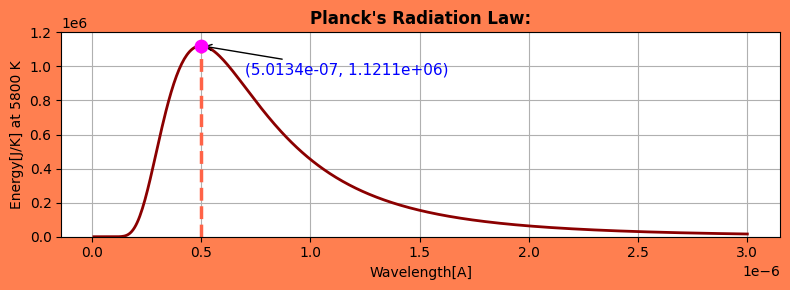

In [11]:
plt.figure(1,figsize=(8,3),facecolor='coral')

plt.plot(Lambda,Ep,color='darkred',linewidth=2)
plt.title("Planck's Radiation Law:",fontweight=900)
plt.xlabel('Wavelength[A]')
plt.ylabel(f'Energy[J/K] at {T} K')
plt.ylim(0,1.2e6)
plt.grid()

# E) Mark Lmax with vertical line
plt.vlines(x=Lmax, ymin=0, ymax=Emax, linestyle='dashed', linewidth=2.5, color='tomato')
# axvline take y b/w [0,1] -> fraction height of plot window
# OR plt.axvline(x=Lmax,ymin=0,ymax=(1/1.2e6)*Emax,linestyle='dashed',linewidth=2.5,color='tomato')

# Mark Emax point
plt.scatter(Lmax, Emax, s=80, color='magenta', zorder=5)  # Scatter plot to mark the point
plt.annotate(f'({Lmax:.4e}, {Emax:.4e})', xy=(Lmax, Emax), xytext=(Lmax*1.4, Emax*0.85),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=11, color='blue')

plt.tight_layout()
plt.show()

F) Find weins constant

In [13]:
b = Lmax*T
print(f"Wein's constant: {b:.3e}")

Wein's constant: 2.908e-03
